# DECISION TREE

-  ***** Problem : Titanic Survior Prediction Kaggle Challenge *****



### Simple Tree like structure, model makes a decision at every node

- Useful in simple tasks
- One of the most popular algorithm
- Easy explainability, easy to show how a decision process works!

### Why decision trees are popular?

- Easy to interpret and present
- Well defined Logic, mimic human level thought
- Random Forests, Ensembles of decision trees are more powerful classifiers
- Feature values are preferred to be categorical. If the values are continuous then they are discretized prior to building the model.

### Build Decision Trees

Two common algorithms -

CART (Classification and Regression Trees) → uses Gini Index(Classification) as metric.
ID3 (Iterative Dichotomiser 3) → uses Entropy function and Information gain as metrics




![](titanic.jpg)



# LEARNING GOALS


- How to pre-process data?
- Dropping not useful features
- Filling the missing values (Data Imputation)
- Creating a Binary Decision Tree from Scratch

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("titanic.csv")

In [3]:
data.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
columns_to_drop = ["PassengerId","Name","Ticket","Cabin","Embarked"]

In [6]:
data_clean = data.drop(columns_to_drop,axis=1)

In [7]:
data_clean.head(n=5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data_clean["Sex"] = le.fit_transform(data_clean["Sex"])

In [9]:
data_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [10]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int32
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.3 KB


In [11]:
data_clean = data_clean.fillna(data_clean["Age"].mean())  #imuter ---> Sklearn

In [12]:
data_clean.loc[1]

Survived     1.0000
Pclass       1.0000
Sex          0.0000
Age         38.0000
SibSp        1.0000
Parch        0.0000
Fare        71.2833
Name: 1, dtype: float64

In [13]:
input_cols = ['Pclass',"Sex","Age","SibSp","Parch","Fare"]
output_cols = ["Survived"]

X = data_clean[input_cols]
Y = data_clean[output_cols]

print(X.shape,Y.shape)
print(type(X))

(891, 6) (891, 1)
<class 'pandas.core.frame.DataFrame'>


In [14]:
# Define Entropy and Information Gain

def entropy(col):
    
    counts = np.unique(col,return_counts=True)
    N = float(col.shape[0])
    
    ent = 0.0
    
    for ix in counts[1]:
        p  = ix/N
        ent += (-1.0*p*np.log2(p))
    
    return ent

In [15]:
def divide_data(x_data,fkey,fval):
    #Work with Pandas Data Frames
    x_right = pd.DataFrame([],columns=x_data.columns)
    x_left = pd.DataFrame([],columns=x_data.columns)
    
    for ix in range(x_data.shape[0]):
        val = x_data[fkey].loc[ix]
        
        if val > fval:
            x_right = x_right.append(x_data.loc[ix])
        else:
            x_left = x_left.append(x_data.loc[ix])
            
    return x_left,x_right

In [16]:
#x_left,x_right = divide_data(data_clean[:10],'Sex',0.5)
#print(x_left)
#print(x_right)

In [17]:
def information_gain(x_data,fkey,fval):
    
    left,right = divide_data(x_data,fkey,fval)
    
    #% of total samples are on left and right
    l = float(left.shape[0])/x_data.shape[0]
    r = float(right.shape[0])/x_data.shape[0]
    
    #All examples come to one side!
    if left.shape[0] == 0 or right.shape[0] ==0:
        return -1000000 #Min Information Gain
    
    i_gain = entropy(x_data.Survived) - (l*entropy(left.Survived)+r*entropy(right.Survived))
    return i_gain

In [18]:
# Test our function
for fx in X.columns:
    print(fx)
    print(information_gain(data_clean,fx,data_clean[fx].mean()))

Pclass
0.07579362743608165
Sex
0.2176601066606142
Age
0.0008836151229467681
SibSp
0.009584541813400071
Parch
0.015380754493137694
Fare
0.042140692838995464


In [19]:
class DecisionTree:
    
    #Constructor
    def __init__(self,depth=0,max_depth=5):
        self.left = None
        self.right = None
        self.fkey = None
        self.fval = None
        self.max_depth = max_depth
        self.depth = depth
        self.target = None
        
    def train(self,X_train):
        
        features = ['Pclass','Sex','Age','SibSp', 'Parch', 'Fare']
        info_gains = []
        
        for ix in features:
            i_gain = information_gain(X_train,ix,X_train[ix].mean())
            info_gains.append(i_gain)
            
        self.fkey = features[np.argmax(info_gains)]
        self.fval = X_train[self.fkey].mean()
        print("Making Tree Features is",self.fkey)
                #Split Data
        data_left,data_right = divide_data(X_train,self.fkey,self.fval)
        data_left = data_left.reset_index(drop=True)
        data_right = data_right.reset_index(drop=True)
         
        #Truly a left node
        if data_left.shape[0]  == 0 or data_right.shape[0] ==0:
            if X_train.Survived.mean() >= 0.5:
                self.target = "Survive"
            else:
                self.target = "Dead"
            return
        #Stop earyly when depth >=max depth
        if(self.depth>=self.max_depth):
            if X_train.Survived.mean() >= 0.5:
                self.target = "Survive"
            else:
                self.target = "Dead"
            return
        
        #Recursive Case
        self.left = DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.left.train(data_left)
        
        self.right = DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.right.train(data_right)
        
        #You can set the target at every node
        if X_train.Survived.mean() >= 0.5:
            self.target = "Survive"
        else:
            self.target = "Dead"
        return
    
    def predict(self,test):
        if test[self.fkey]>self.fval:
            #go to right
            if self.right is None:
                return self.target
            return self.right.predict(test)
        else:
            if self.left is None:
                return self.target
            return self.left.predict(test)

## Train-Validation-Test Set Split

In [20]:
split = int(0.7*data_clean.shape[0])
train_data = data_clean[:split]
test_data = data_clean[split:]
test_data = test_data.reset_index(drop=True)

In [21]:
print(train_data.shape,test_data.shape)

(623, 7) (268, 7)


In [22]:
dt = DecisionTree()

In [23]:
dt.train(train_data)

Making Tree Features is Sex
Making Tree Features is Pclass
Making Tree Features is Age
Making Tree Features is SibSp
Making Tree Features is Pclass
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is SibSp
Making Tree Features is Parch
Making Tree Features is Pclass
Making Tree Features is SibSp
Making Tree Features is Fare
Making Tree Features is Parch
Making Tree Features is Age
Making Tree Features is Pclass
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Parch
Making Tree Features is SibSp
Making Tree Features is Fare
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Fare
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Fare
Making Tree Features is Age
Making Tree Features is Parch
Making Tree Features is Fare
Making Tree Features is Fare
Making Tree Features is Fare
Making Tree Features is Age
Making Tree Features is Fare
Making Tree Features is Parch
Making Tre

In [24]:
print(dt.fkey)
print(dt.fval)
print(dt.left.fkey)
print(dt.right.fkey)

Sex
0.6292134831460674
Pclass
Fare


In [25]:
y_pred = []
for ix in range(test_data.shape[0]):
    y_pred.append(dt.predict(test_data.loc[ix]))

In [26]:
y_pred

['Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Survive',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Survive',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'De

In [27]:
y_actual = test_data[output_cols]

In [28]:
le = LabelEncoder()
y_pred = le.fit_transform(y_pred)

In [29]:
print(y_pred)

[0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0
 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0
 0 0 0 0 0 1 0 0 0]


In [30]:
y_pred = np.array(y_pred).reshape((-1,1))
print(y_pred.shape)

(268, 1)


In [31]:
acc = np.sum(y_pred==y_actual)/y_pred.shape[0]

In [32]:
acc = np.sum(np.array(y_pred)==np.array(y_actual))/y_pred.shape[0]

In [33]:
print(acc)

0.8171641791044776


## Decision Tree using Sklearn

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
sk_tree = DecisionTreeClassifier(criterion='gini',max_depth=5)

In [36]:
sk_tree.fit(train_data[input_cols],train_data[output_cols])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [37]:
sk_tree.predict(test_data[input_cols])

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0], dtype=int64)

In [38]:
sk_tree.score(test_data[input_cols],test_data[output_cols])

0.8171641791044776

## Visualise a Decison Tree

In [39]:
import pydotplus

from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

c:\users\manjeet singh\appdata\local\programs\python\python37\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [40]:
dot_data = StringIO()
export_graphviz(sk_tree,out_file=dot_data,filled=True,rounded=True)

In [41]:
! python -m pip install graphviz

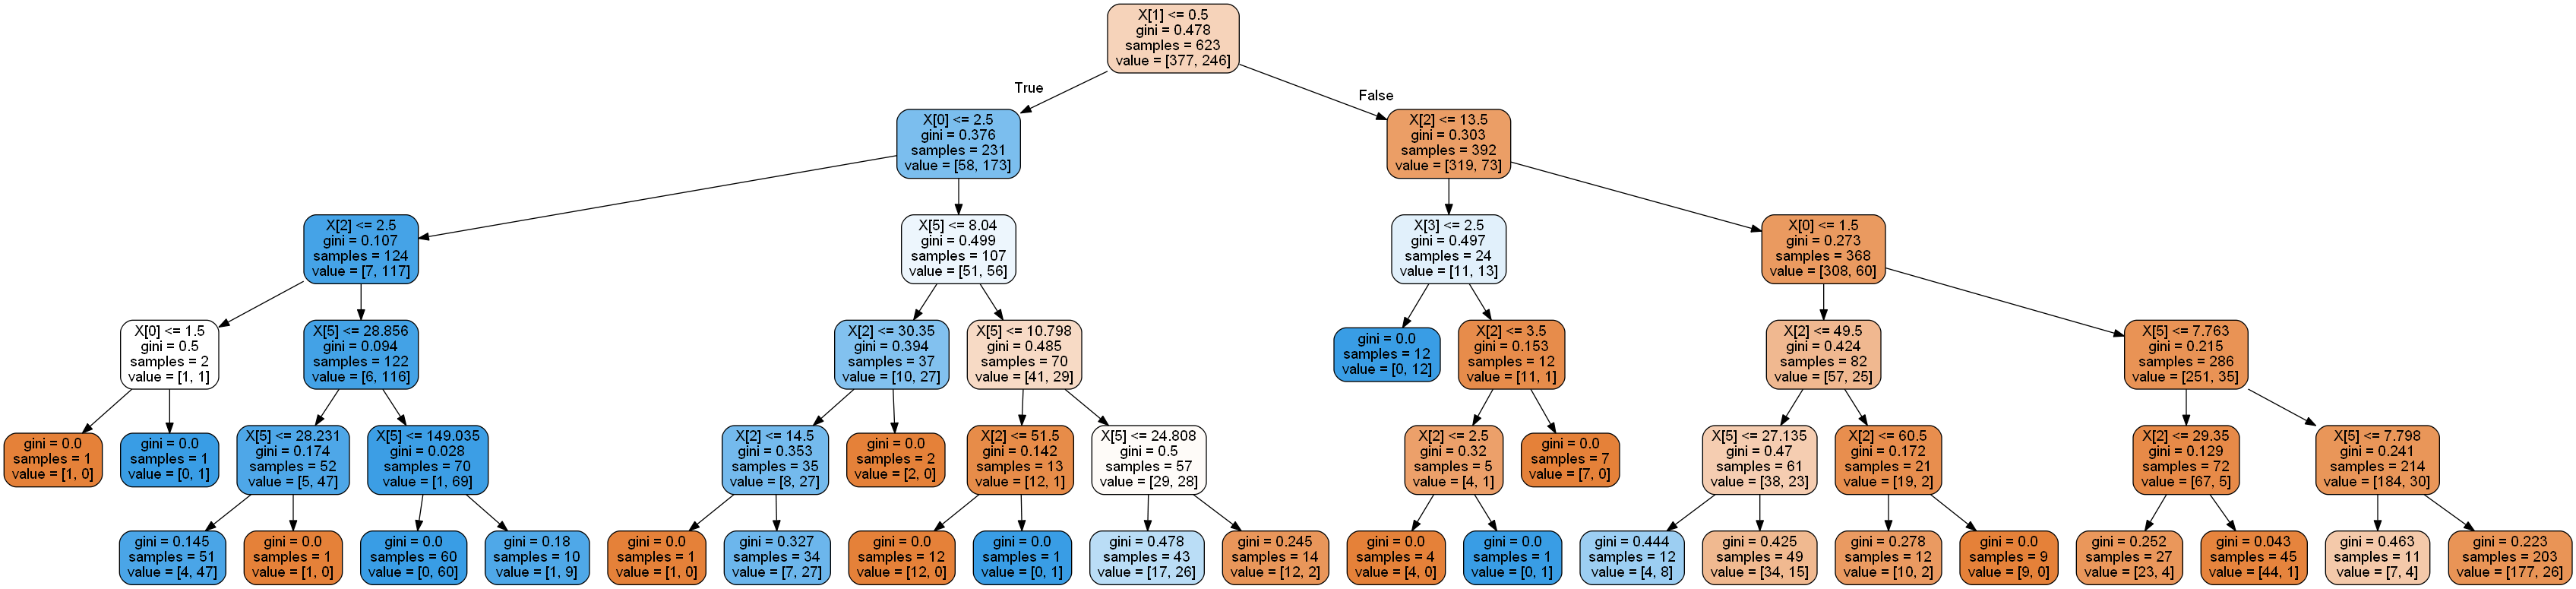

In [42]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Random Forests

In [43]:
X_train = train_data[input_cols]
Y_train = np.array(train_data[output_cols]).reshape((-1,))
X_test = test_data[input_cols]
Y_test = np.array(test_data[output_cols]).reshape((-1,))

In [44]:
sk_tree = DecisionTreeClassifier(criterion='entropy',max_depth=5)
sk_tree.fit(X_train,Y_train)
sk_tree.score(X_train,Y_train)

0.8443017656500803

In [45]:
sk_tree.score(X_test,Y_test)

0.8283582089552238

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf = RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=5)

In [48]:
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [49]:
rf.score(X_train,Y_train)

0.8667736757624398

In [50]:
rf.score(X_test,Y_test)

0.8283582089552238

In [51]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(RandomForestClassifier(n_estimators=40,max_depth=5,criterion='entropy'),X_train,Y_train,cv=5).mean()

In [52]:
print(acc)

0.8091420378904249


In [53]:
acc_list = []
for i in range(1,50):
    acc = cross_val_score(RandomForestClassifier(n_estimators=i,max_depth=5),X_train,Y_train,cv=5).mean()
    acc_list.append(acc)

In [54]:
print(acc_list)

[0.7624966717869943, 0.7511547363031235, 0.792974091141833, 0.7931539170506913, 0.8138273425499232, 0.797942242703533, 0.7723660010240655, 0.8059166410650282, 0.7978263184843831, 0.809078341013825, 0.8235172555043523, 0.8043418330773168, 0.8154015360983102, 0.8074783410138249, 0.8347307731694829, 0.82516866359447, 0.8090400409626216, 0.8074140296979007, 0.8058136200716846, 0.8171807475678443, 0.8140063492063492, 0.821878750640041, 0.8155297491039427, 0.8203168458781361, 0.7995160266257042, 0.8266789554531488, 0.8059033282130056, 0.8154658474142344, 0.8123807475678444, 0.820342857142857, 0.8074525345622121, 0.8171041474654377, 0.8219041474654378, 0.8203299539170507, 0.813852944188428, 0.8186400409626217, 0.8154783410138249, 0.8139422427035331, 0.813942242703533, 0.8250914490527392, 0.833104761904762, 0.8139037378392218, 0.8251172555043522, 0.8283432667690732, 0.8170910394265233, 0.8251043522785458, 0.8218660522273427, 0.8187299539170507, 0.8331561699948796]


In [55]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
plt.plot(acc_list)
plt.show()

<Figure size 800x550 with 1 Axes>

In [56]:
print(np.argmax(acc_list))

14


In [57]:
rf = RandomForestClassifier(n_estimators=22,max_depth=5,criterion='entropy')
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=22,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [58]:
rf.score(X_train,Y_train)

0.85553772070626

In [59]:
rf.score(X_test,Y_test)

0.8246268656716418

# "Titanic Kaggle Challenge!"


![](titanic.gif)